# Práctica 3: Solución de ecuaciones diferenciales lineales con coeficientes constantes.

Las ecuaciones diferenicales de la forma: 

```{math}
:label: edo_lineal_gral
\begin{equation}
 a_n\frac{d^ny(t)}{dt^n}+a_{n-1}\frac{d^{n-1}y(t)}{dt^{n-1}}+\cdots+a_0y(t)=0
\end{equation}
````
donde $a_n \in \mathbb{R}$ para $n=0,1,2,3...n$ se conocen como ecuaciones diferenciales ordinarias lineales con coeficientes constantes. Además en el caso de la ecuación {eq}`edo_lineal_gral` se dice que es homogénea por que está igualada a cero. Para resolver este tipo de ecuaciones diferenciales, se usa una ecuación auxiliar:


```{math}
:label: edo_lineal_aux
\begin{equation}
 a_nD^n+a_{n-1}D^{n-1}+\cdots+a_0=0
\end{equation}
````
Al encontrar las raices de la ecuacion auxiliar {eq}`edo_lineal_aux` se encuetra la estructura general de la solución de la ecuación diferencial dada por la  ecuación {eq}`edo_lineal_gral`. La siguiente tabla nos dice las posibilidades:


```{list-table} Tabla de soluciones para la EDO homogénea
:header-rows: 1
:name: Tabla_sol
* - Raices de la ecuación auxiliar
  - Función solución candidata
* - Una raiz real $\alpha_1$
  - $C_1e^{\alpha_1t}$
* - Dos raices reales y distintas $\alpha_1$ y $\alpha_2$
  - $C_1e^{\alpha_1t}+C_2e^{\alpha_2t}$
* - Dos raices reales e iguales $\alpha_1=\alpha_2=\alpha$ 
  - $(C_1+C_2t)e^{\alpha t}$ 
* - Tres raices reales e iguales $\alpha_1=\alpha_2=\alpha_3=\alpha$ 
  - $(C_1+C_2t+C_3t^2)e^{\alpha t}$ 
* - Dos raices complejas conjugadas $\alpha \pm i\beta$
  - $(C_1cos(\beta t)+C_2sen(\beta t))e^{\alpha t}$ 
* - Dos pares de raices complejas iguales $\alpha \pm i\beta$
  - $[(C_1+C_2t)cos(\beta )+(C_1+C_2t)sen(\beta ))]e^{\alpha t}$   
```
Los valores de las constantes $C_1$ y $C_2$ están determinados por las condiciones iniciales $y(0)$ y $\dot{y}(0)$.
Las raices de la ecuación auxiliar se pueden calcular usando MATLAB, por medio del comando `roots()`. 

## Sistema masa resorte amortiguador.

Como un ejemplo de aplicación de las ecuaciones diferenciales, se obtiene la función de movimiento del sistema masa resorte amortiguador mostrado en la {numref}`mbk_payaso` y cuyos parámetros se presentan en la {numref}`Tabla_param`, sujeto a condiciones iniciales $x(0)=0.025~[m]$ y $\dot{x}(0)=0~[m/s]$

```{figure} /images/payaso.png
:height: 250px
:name: mbk_payaso
Sistema masa resorte amortigador.
```


```{list-table} Tabla de parámetros del sistema masa resorte amortiguador
:header-rows: 1
:name: Tabla_param
* - $$Parámetro$$
  - $$Valor$$
* - $$m$$
  - $$43~[grs]$$
* - $$b$$
  - $$0.0015~[Ns/m]$$
* - $$k$$  
  - $$4.3~[N/m]$$ 
* - $$f(t)$$ 
  - $$0~[N]$$
```
En este caso, la ecuación diferencial, se encuentra sustituyendo los valores de $m$, $b$ y $k$ para obtener:

```{math}
:label: edombk2
\begin{equation}
  0.043\frac{d^2x(t)}{dt^2}+0.0015\frac{dx(t)}{dt}+4.3x(t)=0
	\end{equation}
```
la ecuación auxiliar toma la forma:

```{math}
:label: edo_aux
\begin{equation}
 0.043D^2+0.0015D+4.3=0
\end{equation}
````
Las raices se obtienen usado la siguiente instrucción en MATLAB:

In [1]:
roots([0.043 0.0015 4.3])

ans = 
  -0.0174 +10.0000i
  -0.0174 -10.0000i

Entonces, de acuerdo con la {numref}`Tabla_sol`, la solución $x(t)$ para este sistema es la función de movimiento de la masa $m$ y toma la forma:

```{math}
:label: ec_mov
\begin{equation}
 x(t)=(C_1cos(10t)+C_2sen(10t))e^{-0.0174t}
\end{equation}
````
Usando las condiciones iniciales $x(0)=0.025$ y $\dot{x}(0)=0$:

$$
\begin{eqnarray}
 x(0)=0.025=(C_1cos(10(0))+C_2sen(10(0)))e^{-0.0174(0)}=C_1\\
\dot{x}(t)=\frac{d[(C_1cos(10t)+C_2sen(10t))e^{-0.0174t}]}{dt}=0\\
\end{eqnarray}
$$

De aqui se desprende que:

$$
\dot{x}(t)=(-10C_1sen(10t)+10C_2cos(10t))e^{-0.0174t}-0.0174(C_1cos(10t)+C_2sen(10t))e^{-0.0174t}
$$

sustituyendo $C_1=0.025$ y evaluando $\dot{x}(0)$:

$$
(-0.25sen(0)+10C_2cos(0))e^{0}-0.0174(0.025cos(0)+C_2sen(0))e^{0}=0
$$

$$
10C_2-0.0174(0.025)=0\Longrightarrow C_2=4.35\times 10^{-5}
$$

Entonces, la ecuación diferencial tiene por solución a la función $x(t)$, o bien la ecuación de movimiento:

$$
x(t)=e^{-0.0174t}(0.025cos(10t)+4.35\times 10^{-5}sen(10t))~[m]
$$

Es posible graficar esta solución usando MATLAB:


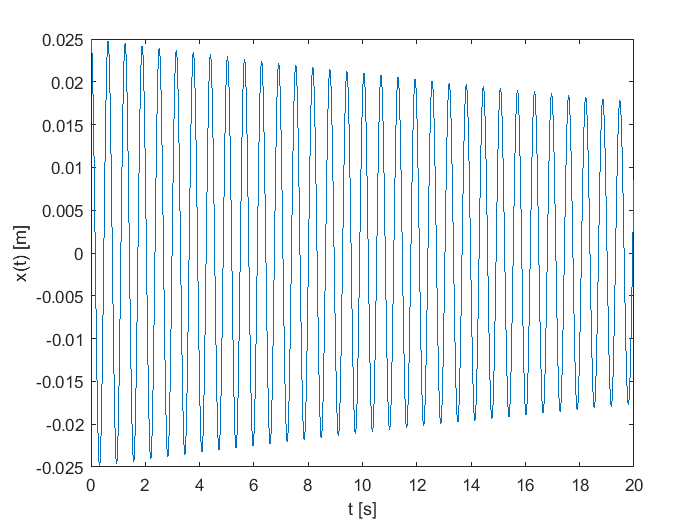

In [1]:
clear
clc

t=[0:0.001:20];
x=exp(-0.0174*t).*(0.025*cos(10*t)+(4.35e-5)*sin(10*t));
plot(t,x)
xlabel("t [s]")
ylabel("x(t) [m]")


## Determinación de la respuesta forzada de sistemas.

En el ejemplo anterior se encontró la solución de la ecuación diferencial de movimiento de un sistema masa resorte amortiguador, en condicion de vibración libre y sujeto a condiciones iniciales $x(0)$ y $\dot{x}(0)$. El modelo matemático del sistema en estas condiciones es una ecuación diferencial homogénea como la expresada en la ecuación ({eq}`edo_lineal_gral`), cuando la ecuación diferencial que modela al sistema no es homogénea, se trata del modelo matemático de la respuesta forzada del sistema. Para determinar la respuesta forzada de un sistema lienal e invariante en el tiempo, el procedimiento se divide en dos pasos principales, encontrar la solución de la ecuación diferencial homogénea y sumar la solución particular o forzada. Bajo esta premisa, se concluye que ante cualquier perturbación, el sistema responde conforme a su propia naturaleza (determinada por la solución homogénea), esta respuesta se desvanece con el tiempo y se conoce como estado transitorio. Después de que se desvanece el estado transitorio el sistema tendrá una respuesta que permanece en el tiempo que se conoce como estado estacionario y estará determinada por la naturaleza de la perturbación. La forma de la solución particular o estacionaria incluye a la perturbación o estímulo de entrada al sistema $x(t)$ y todas sus derivadas linealmente independientes (que no se pueden representar como una suma de las otras derivadas multiplicadas por constantes reales $k_i\in \mathbb{R}$) 
asumiendo que la solución particular propuesta tiene un número finito de derivadas ({cite}`Alkin`). Por ejemplo para una señal estímulo $x(t)=cos(a t)$, se construye una solución particular de la forma:

```{math}
:label: yp_cos
\begin{equation}
 y_p(t)=k_1cos(at)+k_2sen(at)
\end{equation}
````
Los parámetros $k_1,k_2 \in \mathbb{R}$ se determinan por la estructura própia de la ecuación diferencial que modela al sistema. En la siguiente tabla se muestra un conjunto de estructuras posibles para la solución particular de la ecuación diferencial no homogénea ({cite}`Alkin`).

```{list-table} Tabla de soluciones particulares
:header-rows: 1
:name: Tabla_forzada
* - Señal de entrada
  - Solución particular candidata
* - $k$
  - $k_1$
* - $ke^{at}$
  - $k_1e^{at}$
* - $kcos(at)$
  - $k_1cos(at)+k_2sen(at)$ 
* - $ksen(at)$
  - $k_1cos(at)+k_2sen(at)$ 
* - $kt^{n}$
  - $k_nt^{n}+k_{n-1}t^{n-1}+\cdots k_1t+k_0$  
```

Los coeficientes de la solución particular se determinan por la estructura de la ecuación diferencial, asumiendo condiciones iniciales iguales a cero, debido a que `la solución particular o forzada no depende de las condiciones iniciales o del estado inicial del sistema`. Las condiciones iniciales específicas se se imponen en un paso posterior para determinar los coeficientes $C_1$ y $C_2$ de la solución particular. A continuación se presenta un ejemplo para ilustar el procedimiento para determinar la respuesta forzada de los sistemas ante un estímulo $x(t)\neq 0$.

## Circuito RLC serie.

Otro ejemplo clásico de aplicación de los modelos matemáticos consiste en el analisis de corriente y voltaje de un circuito que consta de una resistencia, un capacitor y un inductor en serie como se muestra en la {numref}`RLCeq1`, cuyos parámetros se reportan en la {numref}`Tabla_paramRLC`. 

```{figure} /images/Imagen8.png
:height: 300px
:name: RLCeq1
Circuito RLC
```

```{list-table} Tabla de parámetros del circuito RLC
:header-rows: 1
:name: Tabla_paramRLC
* - $$Parámetro$$
  - $$Valor$$
* - $$V_s$$
  - $$1.63~[V]$$
* - $$L$$  
  - $$15.1~[H]$$ 
* - $$C$$ 
  - $$1.01~\mu [F]$$
* - $$R$$
  - $$1600~[\Omega]$$
* - $$v_c(0)$$
  - $$0~[V]$$
* - $$i_c(0)$$
  - $$0~[A]$$  
```

De las relaciones constitutivas de los elementos del sistema eléctricos descritas en la ecuación {eq}`relconst2` y dado que  $i_C(t)=i(t)=C\frac{dv_c}{dt}$. La ecuación diferencial que modela a este sistema eléctrico se escribe como:

```{math}
:label: edoRLC2
\begin{equation}
  LC\frac{d^2v_c(t)}{dt^2}+RC\frac{dv_c(t)}{dt}+v_c(t)=V_s(t)
	\end{equation}
```
O bien, en notación compacta: 

```{math}
:label: edoRLCcomp
\begin{equation}
  LC\ddot{v}_c+RC\dot{v}_c+v_c=V_s
	\end{equation}
```
la ecuación diferencial, se encuentra sustituyendo los valores de $R$, $L$ y $C$ en la ecuación diferencial {eq}`edoRLC2` para obtener:

```{math}
:label: edoRLC3
\begin{equation}
  1.661\times 10^{-5}\frac{d^2v_c(t)}{dt^2}+ 0.0018\frac{dv_c(t)}{dt}+v_c(t)=1.63
	\end{equation}
```
En este caso, la ecuación diferencial es no homogénea. Por lo tanto la solución está formada por la solución homogénea mas la solución particular, de manera que la solución toma la forma $v_c(t)=v_{ch}+v_{cp}$, con $v_{ch}$ la solución de la homogénea asociada y $v_{cp}$ la solución particular. Por otra parte la ecuación auxiliar, para determinar la solución homogénea toma la forma:

```{math}
:label: edo_auxRLC
\begin{equation}
  1.661\times 10^{-5}D^2+0.0018D+1=0
\end{equation}
````
Las raices se obtienen usado la siguiente instrucción en MATLAB:

In [3]:
L=15.1;
C=1.1e-6;
R=1600;

roots([L*C R*C 1])


ans = 
   1.0e+02 *

  -0.5298 + 2.3958i
  -0.5298 - 2.3958i

De aquí se desprende que, de acuerdo con la {numref}`Tabla_sol`, la solución de la homogénea asociada es:

$$
v_{ch}=(C_1cos(239.58t)+C_2sen(239.58t))e^{-52.98t}
$$

Para este sistema, se cumple que la solución particular es una constante, $v_{cp}=1.63$, de acuerdo con la {numref}`Tabla_forzada`, por lo tanto la solución completa para el voltaje en el capacitor adquiere la forma:

```{math}
:label: sol_compRLC
\begin{equation}
   v_c(t)=v_{ch}+v_{p}=(C_1cos(239.58t)+C_2sen(239.58t))e^{-52.98t}+1.63
\end{equation}
````

Sabiendo que $v_c(0)=0$ y $\dot{v}_c(0)=0$ y sustituyendo la ecuación {eq}`sol_compRLC` en la ecuación {eq}`edoRLC3` se obtiene el valor de los coeficientes $C_1$ y $C_2$.

$$
\begin{eqnarray}
 v_c(t)=(C_1cos(239.58t)+C_2sen(239.58t))e^{-52.98t}+1.63\\
\dot{v}_c(t)=\frac{d[(C_1cos(239.58t)+C_2sen(239.58t))e^{-52.98t}+1.63 ]}{dt}\\
\end{eqnarray}
$$

Evaluando $v_c(0)$ y $\dot{v}_c(0)$:

```{math}
:label: eval_v0
\begin{eqnarray}
 v_c(0)=(C_1cos(239.58(0))+C_2sen(239.58(0)))e^{-52.98(0)}+1.63=0\\
\dot{v}_c(0)=(-239.58C_1sen(0)+239.58C_2cos(0))e^{0}-52.98(C_1cos(0)+C_2sen(0))e^{0}
\end{eqnarray}
````
Las ecuaciones {eq}`eval_v0` conducen a:


$$
v_c(0)=(C_1cos(0)+C_2sen(0))e^{0}+1.63=0\Longrightarrow C_1=-1.63
$$

Sustituyendo $C_1$ en la ecuación {eq}`eval_v0`

$$
\dot{v}_c(0)=(390.5154sen(0)+239.58C_2cos(0))e^{0}-52.98(-1.63cos(0)+C_2sen(0))e^{0}=0
$$

De donde se obtiene que:

$$
239.58C_2+86.357=0\Longrightarrow C_2=-0.3605
$$

Luego entonces, la solución completa de la ecuación diferencial, o bien el voltaje en el capacitor $v_c(t)$ es:

```{math}
:label: sol_vc
\begin{equation}
   v_c(t)=v_{ch}+v_{cp}=(-1.63cos(239.58t)-0.3605sen(239.58t))e^{-52.98t}+1.63
\end{equation}
````
La gráfica del voltaje en el capacitor contra el tiempo se grafica con las instrucciones de MATLAB:

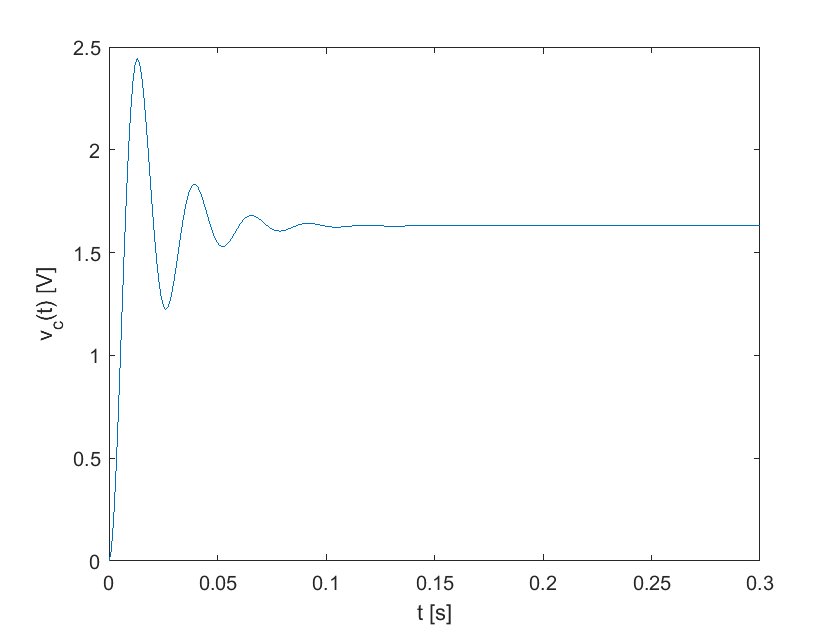

In [4]:
clear 
close all

t=[0:0.001:0.3];
v_c=(-1.63*cos(239.58*t)-0.3605*sin(239.58*t)).*exp(-52.98*t)+1.63;
plot(t,v_c)
xlabel("t [s]")
ylabel("v_c(t) [V]")

## Respuesta forzada con diferentes parámetros.

Es posible encontrar diferentes respuestas del sistema usando una estructura general para el caso particular cuando la función de estímulo es una constante. Para el caso particular del circuito RLC serie, en el que la respuesta forzada completa obedece la estructura:

```{math}
:label: sol_compRLC_general
\begin{equation}
   v_c(t)=(C_1cos(\beta t)+C_2sen(\beta t))e^{\alpha t}+k
\end{equation}
````
donde $k$ es la amplitud de una señal tipo escalón. Cuando las condiciones iniciales $v_c(0)$ y $\dot{v}_c(0)$ las constantes $C_1$, $C_2$ y $k$ se pueden obtener al encontrar las raices $r_{i},~i=1,2$ del polinomio auxiliar {eq}`edo_auxRLC`:

$$
r_{i}=\alpha \pm \beta i
$$

Usando las partes real e imaginaria de la primera raíz, se encuentra el valor de dichas constantes:

```{math}
:label: calculo_constantes
\begin{eqnarray}
   k=v_s\\
   C_1=-v_s\\
   C_2=\frac{-\alpha C_1}{\beta}
\end{eqnarray}
````
El siguiente código en MATLAB permite graficar la respuesta al escalón con diferentes valores de los parámetros RLC para fines comparativos, se genera una respuesta de referencia y después se calculan las raices del nuevo polinomio auxiliar definido en la ecuación {eq}`edo_auxRLC`, para graficar las dos respuestas y compararlas.

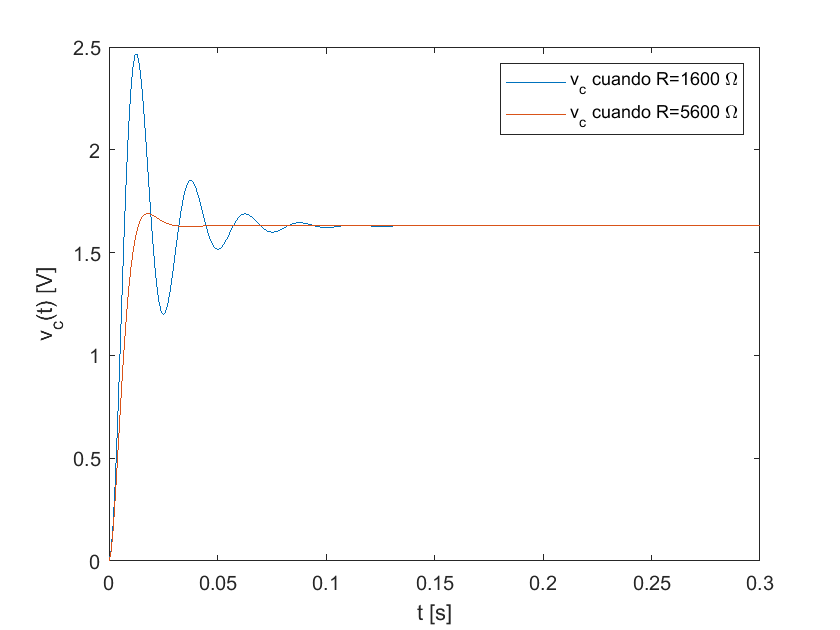

In [8]:
clear 
close all 
clc 

R=1600;
L=15.1; % Parámetros originales o de referencia
C=1.01e-6;

vs=1.63; % Voltaje de la fuente o escalón

t=[0:0.001:0.3]; %Vector de tiempo

raices=roots([L*C R*C 1]); % Cálculo de las raices del polinomio auxiliar

alpha=real(raices(1)); % Se extraen las partes real e imaginaria
betha=imag(raices(1)); 

% Se determinan los valores de C1 y C2 de la solución homogénea
C1=-vs;
C2=-alpha*C1/betha;
k=vs;

v_c=(C1*cos(betha*t)+C2*sin(betha*t)).*exp(alpha*t)+vs;
plot(t,v_c)
xlabel("t [s]")
ylabel("v_c(t) [V]")
hold on % Se deja abierta la imagen para graficar la respuesta con 
% un valor diferente de algún parámetro para fines comparativos

%-------------------------------------------------------------
%  Se calcula la nueva respuesta vc con R=5600
%-------------------------------------------------------------

R=5600; % se acualiza el valor de R

raices=roots([L*C R*C 1]); % Cálculo de las raices del polinomio auxiliar

alpha=real(raices(1)); % Se extraen las partes real e imaginaria
betha=imag(raices(1)); 

% Se determinan los valores de C1 y C2 de la solución homogénea
C1=-vs;
C2=-alpha*C1/betha;
k=vs;

v_c=(C1*cos(betha*t)+C2*sin(betha*t)).*exp(alpha*t)+vs;
plot(t,v_c)
legend("v_c cuando R=1600 \Omega","v_c cuando R="+num2str(R)+" \Omega" )
